# Project :6 Working with Structured Data: Classification

In the realm of maritime operations, accurate detection and classification of underwater objects play a pivotal role in ensuring the safety and efficiency of various endeavours, ranging from underwater exploration to resource extraction. The Sonar dataset, comprising 208 observations, provides a comprehensive repository of sonar chirp returns, offering insights into the characteristics of submerged surfaces. With 60 input variables delineating the strength of returns at different angles, this dataset presents a formidable challenge: the binary classification of rocks and metal cylinders.By leveraging advanced predictive modelling techniques, our aim is to develop a robust solution capable of accurately discerning between these two distinct entities, thereby enhancing operational efficiency, and minimizing risks associated with underwater activities.

        

#### Data Set Description:

The data set contains signals obtained from a variety of different aspect angles, spanning 90 degrees for the cylinder and 180 degrees for the rock. Each pattern is a set of 60 numbers in the range 0.0 to 1.0. Each number represents the energy within a particular frequency band, integrated over a certain period. The label associated with each record contains the letter "R" if the object is a rock and "M" if it is a mine (metal cylinder).  

**Dataset : sonar.csv**

Create a first step document that lists the output of your exploratory analysis, any issues, or problems you may see with data that need follow-up, and some basic descriptive analysis that you think highlights important outcomes/findings from the data. Based on your findings, the next level of analysis will be charted out. Build a predictive base model and use hyperparameter tuning to further optimize the accuracy of the predictions.  

**Initial Guidelines:**

1.	Ensure to follow to Use Id’s provided by UNext for naming file as conventions.
2.	Create GitHub account and submit the GitHub link.

### Software Engineering aspect:  

Utilize software engineering aspects while building Machine learning model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.

### General Instructions 

- The cells in the Jupyter notebook can be executed any number of times for testing the solution
- Refrain from modifying the boilerplate code as it may lead to unexpected behavior 
- The solution is to be written between the comments `# code starts here` and `# code ends here`
- On completing all the questions, the assessment is to be submitted on moodle for evaluation
- Before submitting the assessment, there should be `no error` while executing the notebook. If there are any error causing code, please comment it.
- The kernel of the Jupyter notebook is to be set as `Python 3 (ipykernel)` if not set already
- Include imports as necessary
- For each of the task, `Note` section will provide you hints to solve the problem.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

#### **Utilize software engineering aspects while building the  model using modular programming principles to organize your code into reusable functions or classes to enhance readability, maintainability, and collaboration.**

In [1]:
# Required imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Task 1: Load the dataset and perform preliminary EDA with key observations and insights- (weightage - 20 marks)

#### T1.1: Load the sonar dataset using try and except blocks.          (weightage - 2 marks) (AE)        

#### NOTE:
- The `read_csv` method in Pandas allows you to read csv files and convert them into a DataFrame, which is a two-dimensional tabular data structure in Pandas.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

In [2]:
def load_the_dataset():
    try:
        # code starts here
        df_sonar=pd.read_csv('sonar1.csv')
        # code ends here
        return df_sonar
    except:
        return "File not found. Please check the file path."


In [3]:
# store the result of the dataset
df_sonar =load_the_dataset()
print(df_sonar)

     Unnamed: 0  Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  \
0             0      0.0200      0.0371      0.0428      0.0207      0.0954   
1             1      0.0453      0.0523      0.0843      0.0689      0.1183   
2             2      0.0262      0.0582      0.1099      0.1083      0.0974   
3             3      0.0100      0.0171      0.0623      0.0205      0.0205   
4             4      0.0762      0.0666      0.0481      0.0394      0.0590   
..          ...         ...         ...         ...         ...         ...   
203         203      0.0187      0.0346      0.0168      0.0177      0.0393   
204         204      0.0323      0.0101      0.0298      0.0564      0.0760   
205         205      0.0522      0.0437      0.0180      0.0292      0.0351   
206         206      0.0303      0.0353      0.0490      0.0608      0.0167   
207         207      0.0260      0.0363      0.0136      0.0272      0.0214   

     Attribute6  Attribute7  Attribute8  Attribute9

#### T1.2: What is the distribution of target variable? (Mention in percentage)(weightage - 2 marks)  (AE)             

### NOTE:

* Design a method `target_class` to analyze the distribution of a target variable ("class") within a DataFrame (df). 
* Count the occurrences of each unique value in the 'class' column of the DataFrame df using the `value_counts` method
* Normalizes the counts to obtain proportions instead of counts.
* Scale the proportions to percentages.

In [4]:
def target_class(df):
    #code starts here
    target_dist=df['class'].value_counts(normalize=True)*100
    #code ends
    return target_dist

In [5]:
# store the result
target_distribution = target_class(df_sonar)
print(target_distribution)

M    53.365385
R    46.634615
Name: class, dtype: float64


#### T1.3: Remove the unnecessary column. (weightage - 2 marks)               (AE)

#### Note:
* Unnamed: 0 is the unecessary column.
* Use `drop` method of the dataframe to drop the unnecessary column.

In [6]:
def unecessary_col(df):
    #code starts here
    df.drop(['Unnamed: 0'], axis=1, inplace=True)
    #code ends here
    return df

In [7]:
#Store the result into a new dataframe
df_sonar_updated = unecessary_col(df_sonar)
print(df_sonar_updated)

     Attribute1  Attribute2  Attribute3  Attribute4  Attribute5  Attribute6  \
0        0.0200      0.0371      0.0428      0.0207      0.0954      0.0986   
1        0.0453      0.0523      0.0843      0.0689      0.1183      0.2583   
2        0.0262      0.0582      0.1099      0.1083      0.0974      0.2280   
3        0.0100      0.0171      0.0623      0.0205      0.0205      0.0368   
4        0.0762      0.0666      0.0481      0.0394      0.0590      0.0649   
..          ...         ...         ...         ...         ...         ...   
203      0.0187      0.0346      0.0168      0.0177      0.0393      0.1630   
204      0.0323      0.0101      0.0298      0.0564      0.0760      0.0958   
205      0.0522      0.0437      0.0180      0.0292      0.0351      0.1171   
206      0.0303      0.0353      0.0490      0.0608      0.0167      0.1354   
207      0.0260      0.0363      0.0136      0.0272      0.0214      0.0338   

     Attribute7  Attribute8  Attribute9  Attribute1

#### T1.4: Check missing values in the data in terms of percentage and do missing value treatment.  (weightage - 2 marks)       (AE)

#### NOTE:
- Find the percentage of missing values in the data by dividing the total number of missing values by the total number of rows and multiplying by 100, you will get the percentage of missing values for each column. 
- Use `isnull().sum()` to calculate the total number of missing values in each column and `shape[0]` to get the total number of rows in the DataFrame.
- Do not use `PRINT` statement inside the `Except` Block. Please use `return` statement only within the except block

In [8]:
def missing_value_check(df):
    #Code starts here
    try:
        missing=(df.isnull().sum()/df.shape[0])*100
        return missing
    except:
        return None
    # Code ends here

In [9]:
missing_value_check(df_sonar_updated)

Attribute1     0.0
Attribute2     0.0
Attribute3     0.0
Attribute4     0.0
Attribute5     0.0
              ... 
Attribute57    0.0
Attribute58    0.0
Attribute59    0.0
Attribute60    0.0
class          0.0
Length: 61, dtype: float64

#### NOTE:
* For treating the missing value first define the list of columns containing the names of the columns with missing values which will be treated. 
* Iterating over each column name in the columns list fill the missing values in the dataset for that column with the median value of that column. 

In [10]:
# Missing value treatment
def missing_value_treatment(df):
    # Code starts here
    d=missing_value_check(df_sonar_updated)
    cols=list(d[d>0].index)
    for col in cols:
        df[col].fillna(df[col].median(), inplace=True)
    # Code ends here
    return df  

In [11]:
#Check if missing values are treated
df_sonar_updated = missing_value_treatment(df_sonar_updated)
print(df_sonar_updated.isnull().sum())

Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
              ..
Attribute57    0
Attribute58    0
Attribute59    0
Attribute60    0
class          0
Length: 61, dtype: int64


#### T1.5: Visualize the correlation matrix using a heatmap for first 4 input variables. What is the Pearson correlation coefficient between the Attribute1 and Attribute 2? (Bivariate analysis) (weightage - 3 marks)               (AE and ME)

#### NOTE:
* Define a method called `correlation_matrix` to calculate the Pearson correlation coefficient between two specific columns   ('Attribute 1' and 'Attribute 2') in a DataFrame (df).
* Use the `iloc` method to select only the columns corresponding to 'Attribute 1' and 'Attribute 2' from the DataFrame df.
* Calculate the Pearson correlation coefficient using the corr() method on the selected columns.

In [12]:
# Pearson correlation coefficient for Attribute 1 and Attribute 2
def correlation_matrix(df):
    # Code starts here
    correlation=df.iloc[:, 0:2].corr()
    # Code ends here
    return correlation

In [13]:
Correlation_Attribute_1_2 = correlation_matrix(df_sonar_updated)
print(Correlation_Attribute_1_2)

            Attribute1  Attribute2
Attribute1    1.000000    0.735896
Attribute2    0.735896    1.000000


#### NOTE:
* Generate a heatmap visualization of the correlation matrix for the specified subset of columns in the DataFrame 
* Select the first four columns (indexed 0, 1, 2, and 3) of the DataFrame using integer-based indexing. 
* Using seaborn `heatmap` method, generate a heatmap plot of the correlation matrix.
* Using `annot` parameter, display correlation coefficients inside each cell.

<AxesSubplot: >

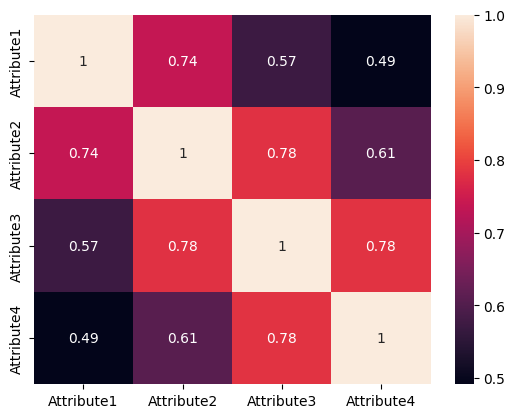

In [14]:
#Visualize using Heatmap
correlation_matrix=df_sonar_updated.iloc[:, 0:4].corr()
sns.heatmap(correlation_matrix, annot=True)

#### T1.6. Perform PCA (Principal Component Analysis) on the input variables. Display the cumulative variance array along with the number of principal components required to capture 90% of information. How many principal components are required to capture 90% of the information?  (AE) 2 Marks

### Note

* Define a method called `pca_inputs` to perform Principal Component Analysis (PCA) on the input DataFrame (df) for the first 60 columns.
* Create a copy of the first 60 columns of the DataFrame df.* and assign it to a new DataFrame `df2`.
* Initialize a StandardScaler object (sc) to standardize the data.
* Standardize the data in `df2` using sc.fit_transform(df2), and store the standardized data in a new DataFrame dfsc.
* Convert dfsc back to a DataFrame with column names from df2 using pd.DataFrame(dfsc, columns=df2.columns)
* Initialize a PCA object (finalpca) for performing PCA.
* Perform PCA on the standardized data dfsc using `finalpca.fit_transform(dfsc)` and store the transformed data in finaldf.
* Obtain the explained variance ratio of each principal component using finalpca.explained_variance_ratio_
* Calculate the number of principal components needed to explain at least 90% of the variance by iterating through the cumulative sum of explained variances (np.cumsum(variation)).

In [15]:
def pca_inputs(df):
    from sklearn.preprocessing import StandardScaler
    from sklearn.decomposition import PCA
    cv, count= None, None
    df2=df.iloc[:, 0:60]
    sc=StandardScaler()
    dfsc=sc.fit_transform(df2)
    dfsc=pd.DataFrame(dfsc, columns=df2.columns)
    finalpca=PCA()
    finaldf=finalpca.fit_transform(dfsc)
    variation=finalpca.explained_variance_ratio_
    count=np.cumsum(variation)
    return variation, count

In [16]:
# Print the cumulative variance and specify the number of principal components that capture 90% of information
cumulative_variance,count = pca_inputs(df_sonar_updated)
print(f'Cumulative variance :{cumulative_variance}')
print(f'Number of principal components that capture 90% of information :{count}')

Cumulative variance :[2.03720133e-01 1.88682423e-01 8.55134773e-02 5.65108919e-02
 5.00380477e-02 4.06689218e-02 3.24825020e-02 3.06592426e-02
 2.51252381e-02 2.36730589e-02 2.13952290e-02 1.90101044e-02
 1.74785979e-02 1.52618132e-02 1.43204461e-02 1.35545891e-02
 1.23195480e-02 1.17065704e-02 1.03552322e-02 9.88341184e-03
 9.57568822e-03 8.94535763e-03 8.52221120e-03 7.73167915e-03
 7.29416252e-03 7.14038108e-03 6.25267361e-03 5.53499766e-03
 5.25198330e-03 5.21050176e-03 4.72606481e-03 4.44572849e-03
 3.63849015e-03 3.45807595e-03 3.32723008e-03 3.01405687e-03
 2.87942996e-03 2.50913875e-03 2.25416120e-03 2.00335822e-03
 1.78186052e-03 1.59232941e-03 1.35401174e-03 1.24260755e-03
 1.06338650e-03 9.79638133e-04 9.41983402e-04 7.38937703e-04
 6.08029891e-04 5.27067881e-04 4.97930901e-04 4.70083792e-04
 4.05011938e-04 3.83056874e-04 3.21712859e-04 2.74550996e-04
 2.47146584e-04 1.94046735e-04 1.90623038e-04 1.11134639e-04]
Number of principal components that capture 90% of information 

#### T1.7: Data Transformation:  Apply normalization technique (standard scalar). (weightage - 3 marks)        (AE)       

### Note

* Define a method called `normalize` to normalize the first 60 columns of a DataFrame (df).
* Use the `iloc` method to select the first 60 columns of the DataFrame df, and apply the StandardScaler to standardize these columns.

In [17]:
def normalize(df):
    from sklearn.preprocessing import StandardScaler
    sc=StandardScaler()
    df_norm=pd.DataFrame(sc.fit_transform(df.iloc[:, 0:60]))
    return df_norm

In [18]:
# Save the standardized data
df_normalized = normalize(df_sonar_updated)
print(df_normalized)

           0         1         2         3         4         5         6   \
0   -0.399551 -0.040648 -0.026926 -0.715105  0.364456 -0.101253  0.682505   
1    0.703538  0.421630  1.055618  0.323330  0.777676  2.607217  1.795719   
2   -0.129229  0.601067  1.723404  1.172176  0.400545  2.093337  2.291885   
3   -0.835555 -0.648910  0.481740 -0.719414 -0.987079 -1.149364 -0.113164   
4    2.050790  0.856537  0.111327 -0.312227 -0.292365 -0.672796  0.087107   
..        ...       ...       ...       ...       ...       ...       ...   
203 -0.456232 -0.116681 -0.705146 -0.779738 -0.647842  0.990954  1.564777   
204  0.136733 -0.861801 -0.366036  0.054026  0.014392 -0.148740 -0.308022   
205  1.004381  0.160078 -0.673843 -0.531979 -0.723629  0.212502  0.173710   
206  0.049533 -0.095392  0.134804  0.148821 -1.055648  0.522865  0.548991   
207 -0.137949 -0.064979 -0.788619 -0.575067 -0.970839 -1.200244 -0.912441   

           7         8         9   ...        50        51        52  \
0  

#### T1.8: Handling categorical features: Apply label encoding technique to convert categorical variable into numerical. (weightage - 2 marks) (AE)

#### NOTE:

* Define a method called `label_encode` to perform label encoding on a categorical column ('class') in a DataFrame (df).
* Initialize a LabelEncoder object (encoder) for encoding categorical labels.
* Use encoder.fit_transform(df[['class']]) to fit and transform the 'class' column into encoded labels. Wrap the result in a DataFrame using pd.DataFrame(...) and assign it to encoded_y.

In [19]:
def label_encode(df):
    # Code starts here
    from sklearn.preprocessing import LabelEncoder
    le=LabelEncoder()
    encoded_y=pd.DataFrame(le.fit_transform(df['class']), columns=['class'])
    # Code ends here
    return encoded_y


In [20]:
# Apply label encoding to class variable
encoded_class = label_encode(df_sonar_updated)
print(encoded_class)

     class
0        1
1        1
2        1
3        1
4        1
..     ...
203      0
204      0
205      0
206      0
207      0

[208 rows x 1 columns]


#### T1.9: Save the cleaned dataset (.xlsx file) by setting the index=False in your GitHub repository for model building process. (This task is for maintaining the version control of datasets)        

#### Refer to the Github document from Lumen to create the repository and steps to commit 
#### Add your Github repository link below 

#### NOTE:
* Concatenate two DataFrames `df_normalized` and `encoded_class` horizontally along the `columns` using the `concat` method
* Using `to_excel` method and setting `index` parameter to `False` save the final dataset in __EXCEL [.xlsx]__ format

In [21]:
df=pd.concat([df_normalized, encoded_class], axis=1)
df.to_excel('sonar1.xlsx', index=False)

In [22]:
# save it in github repository

### Task 2: Build a Neural Network Predictive Model with Grid Search (weightage - 30 marks)               

#### T2.1: Load the cleaned dataset and divide it into predictor and target values (X & y) (weightage – 5 marks) (AE)

#### NOTE:

* Define a method called `load_the_cleaned_dataset` to load a cleaned dataset from an Excel file named 'df_final.xlsx'.
* Use the `pd.read_excel` function to read the Excel file and store the data in a DataFrame called cleaned_df.

In [23]:
# load the cleaned data
def load_the_cleaned_dataset():
        # Code starts here
        cleaned_df=pd.read_excel('sonar1.xlsx')
        # Code ends here
        return cleaned_df

In [24]:
cleaned_df=load_the_cleaned_dataset()

- Separate independent features and target variable

#### NOTE

* Define a method called `separate_data_and_target` to separate the independent features and the target variable from a DataFrame (df).
* Use the `drop` method on the DataFrame df to create a new DataFrame `X` containing only the independent features. Drop the `class` column along the columns axis (axis=1).
* Create a Series `y` containing the target variable by selecting only the `class` column from the original DataFrame df.

In [25]:
# Separate independent features and target variable
def separate_data_and_target(df):
    # Code starts here
    X=df.drop(['class'], axis=1)
    y=df['class']
    # Code ends here
    return X,y

In [26]:
# dependent : X, independent : y
X, y = separate_data_and_target(cleaned_df)
X.shape
# y.shape
# print(y.head())

(208, 60)

In [27]:
print(y.head())

0    1
1    1
2    1
3    1
4    1
Name: class, dtype: int64


#### T2.2: Split the dataset into train and test in the ratio of 80:20. (weightage – 5 marks) (AE)

#### NOTE
* Define a method called `split_into_train_and_test_normalize_features` to split the features (X) and target variable (y) into training and testing sets, and normalize the features.
* Use the `train_test_split` function to split the features (X) and target variable (y) into training and testing sets. Specify the test size as 20% (test_size = .2) and set a random state for reproducibility (random_state=0).

In [28]:

def split_into_train_and_test_normalize_features(X,y):
    # Code starts here
    # Splitting dataset to train and test sets 80% train and 20% test
    from sklearn.model_selection import train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)
    # Code ends here
    return X_train, X_test,y_train,y_test

In [29]:
# split into training and testing
X_train, X_test,y_train,y_test=split_into_train_and_test_normalize_features(X,y)
#X_train

#### Build NN model on training data.Perform hyperparameter tuning using Grid Search. What are the epochs, batch size, and optimizers were selected using grid search?

**Model_versioning**

Save the model as ‘NN_model’ to a version control system GitHub using git commands for collaboration, tracking changes, and ensuring transparency in model development. --- (weightage 20 marks ) (ME)

#### NOTE

* Define a method called `create_baseline` to create a baseline neural network model.
* Inside the method:
    * Create a Sequential model using Sequential() from Keras.
    * Add a Dense layer with 60 units (assuming 60 input features), specify input_dim=60, use 'normal' kernel initializer, and set activation='relu'.
    * Add another Dense layer with 1 unit for binary classification, use 'normal' kernel initializer, and set activation='sigmoid'.
    * Compile the model using model.compile() with 'binary_crossentropy' as the loss function, 'adam' optimizer, and include 'accuracy' as a metric.
* Create Pipeline and Grid Search:
    * Create a pipeline using Pipeline from sklearn.pipeline.
    * Include the KerasClassifier within the pipeline, specifying the build function as create_baseline and set verbose=0.
    * Define the grid search parameters in a dictionary param_grid, such as different batch sizes and epochs.
* Perform Grid Search:
    * Initialize a StratifiedKFold with the desired number of splits (e.g., StratifiedKFold(n_splits=10, shuffle=True)).
    * Use GridSearchCV with the pipeline, parameter grid (param_grid), and cross-validation strategy (cv=kfold) to perform grid search.
    * Fit the grid search object to your training data (X_train, y_train) to find the best model parameters.

In [30]:
import warnings
warnings.filterwarnings("ignore")
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
def create_baseline():
    # Code starts here
    model=Sequential()
    model.add(Dense(60, input_shape=(60,), activation='relu', kernel_initializer='normal'))
    model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    # Code ends here
    return model

2024-06-20 07:16:16.818885: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 07:16:17.908883: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2024-06-20 07:16:17.913952: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-20 07:16:19.767582: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [31]:
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from scikeras.wrappers import KerasClassifier

# create pipeline
classifier=KerasClassifier(model=create_baseline, verbose=0)

# define the grid search parameters
param_grid={'batch_size':[5, 10, 20, 40], 'epochs':[50, 100, 150]}

# perform grid search
kfold=StratifiedKFold(n_splits=10, shuffle=True)
grid=GridSearchCV(classifier, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result=grid.fit(X_train, y_train)

Pipeline(steps=[('classifier',classifier), ('grid', grid), ('grid_result', grid_result)])


Pipeline(steps=[('classifier',
                 KerasClassifier(model=<function create_baseline at 0x7fb3b97e0820>, verbose=0)),
                ('grid',
                 GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                              estimator=KerasClassifier(model=<function create_baseline at 0x7fb3b97e0820>, verbose=0),
                              param_grid={'batch_size': [5, 10, 20, 40],
                                          'epochs': [50, 100, 150]},
                              scoring='accuracy')),
                ('grid_result',
                 GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=None, shuffle=True),
                              estimator=KerasClassifier(model=<function create_baseline at 0x7fb3b97e0820>, verbose=0),
                              param_grid={'batch_size': [5, 10, 20, 40],
                                          'epochs': [50, 100, 150]},
                              scoring='accuracy'))])

In [32]:
# summarize results
print(f'Best: {grid_result.best_score_} using {grid_result.best_params_}')
means=grid_result.cv_results_['mean_test_score']
stds=grid_result.cv_results_['std_test_score']
params=grid_result.cv_results_['params']
for mean, stddev, param in zip(means, stds, params):
    print(f'{mean} ({stddev}) with {param}')

Best: 0.8790441176470587 using {'batch_size': 5, 'epochs': 50}
0.8790441176470587 (0.06079975392922797) with {'batch_size': 5, 'epochs': 50}
0.8669117647058823 (0.06078530201600113) with {'batch_size': 5, 'epochs': 100}
0.8731617647058822 (0.06300080497371158) with {'batch_size': 5, 'epochs': 150}
0.8727941176470587 (0.05759751772813571) with {'batch_size': 10, 'epochs': 50}
0.8669117647058823 (0.05397780044774399) with {'batch_size': 10, 'epochs': 100}
0.8672794117647058 (0.05974575783756346) with {'batch_size': 10, 'epochs': 150}
0.8610294117647058 (0.06586528140164319) with {'batch_size': 20, 'epochs': 50}
0.8610294117647058 (0.06184343721563024) with {'batch_size': 20, 'epochs': 100}
0.8727941176470587 (0.06985681103831543) with {'batch_size': 20, 'epochs': 150}
0.8606617647058823 (0.07177031830753852) with {'batch_size': 40, 'epochs': 50}
0.8676470588235293 (0.07489539995390944) with {'batch_size': 40, 'epochs': 100}
0.8786764705882353 (0.07282753243773167) with {'batch_size': 40,

The results indicate the performance of the baseline model and its variations with different hyperparameters.

#### NOTE
* Utilizes Keras and scikit-learn to create and train a neural network model with the specified parameters.
* Train the model on the training data

In [33]:
classifier=KerasClassifier(model=create_baseline, verbose=0, batch_size=5, epochs=50)
pipe=Pipeline([('classifier', classifier)])
model=pipe.fit(X_train, y_train)

### Task 3: Evaluate the performance of the model using the right evaluation metrics. (weightage - 25 marks)

#### T3.1: Bring the ‘NN-Model’ from a GitHub using git commands and evaluate the model.(ME)

#### T3.2:  Evaluate the NN model with evaluation metrics accuracy, precision, recall, f1 score and roc auc score using sklearn library.(weightage -12 marks) (AE)

#### NOTE
* Create a method called `ROC_AUC` to calculate the ROC-AUC score for a given model's predictions on test data.
* Accept three parameters:
    model: The trained model for which you want to calculate ROC-AUC.
    X_test: The feature matrix of the test data.
    y_test: The true labels of the test data.
* Calculate ROC-AUC Score:
* Use the `predict_proba` method of the model to get the predicted probabilities of the positive class (class 1) for the test data. Ensure to select the probabilities of the positive class.
* Set `verbose=0` to suppress output


In [34]:
from sklearn.metrics import roc_auc_score
def ROC_AUC(model, X_test, y_test):

    ypred_prob = model.predict_proba(X_test, verbose=0)[:, 1]
    # code starts here
    auc_score=roc_auc_score(y_test, ypred_prob)
    # code ends here
    return auc_score

In [35]:
print((ROC_AUC(model,X_test,y_test)))

0.9501133786848072


#### Note
* Create a method called `evaluate_classification` to evaluate a classification model's performance on test data.
* Accept three parameters:
    model: The trained classification model to evaluate.
    X_test: The feature matrix of the test data.
    y_true: The true labels of the test data.
* Calculate Evaluation Metrics
* Use the predict method of the model to get the predicted labels for the test data.
* Calculate evaluation metrics such as accuracy, precision, recall, and F1 score using functions like accuracy_score, precision_score, recall_score, and f1_score from sklearn.metrics in the same order.
* Set `verbose=0` to suppress output

In [36]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
def evaluate_classification(model,X_test,y_true):
    y_pred = model.predict(X_test, verbose=0)
    
    # code starts here
    accuracy=accuracy_score(y_test, y_pred)
    precision=precision_score(y_test, y_pred)
    recall=recall_score(y_test, y_pred)
    f1=f1_score(y_test, y_pred)
    # Code ends here

    return accuracy,precision,recall,f1

In [37]:
evaluate_classification(model,X_test,y_test)

(0.8809523809523809,
 0.9444444444444444,
 0.8095238095238095,
 0.8717948717948718)

After hyperparameter tuning,it has been observed that the parameters 'mlp__batch_size' of 5, 'mlp__epochs'of 150 has given a good accuracy score. The model is then tested on the test dataset and is observed that it works well with a precision score of 0.94,recall of 0.81 and a f1score of 0.871. This classification model can be used to distinguish the rocks from metal cylinders.

#### T3.3 Using Lime/SHAP libraries, explain the prediction of your  model and give inferences. (weightage- 5marks) (ME)

In [42]:
! pip install shap

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 538 kB 18.8 MB/s eta 0:00:01
     |████████████████████████████████| 3.7 MB 58.9 MB/s eta 0:00:01
     |████████████████████████████████| 43.6 MB 65.3 MB/s eta 0:00:01    |█████▊                          | 7.8 MB 65.3 MB/s eta 0:00:01
You should consider upgrading via the '/usr/bin/python3 -m pip install --upgrade pip' command.


In [43]:
import shap
x100=shap.utils.sample(X, 100)
explainer=shap.Explainer(model.predict, x100)
shap_value=explainer(X)

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   1%|▎                  | 3/208 [00:00<?, ?it/s]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   2%|▎          | 5/208 [00:15<04:48,  1.42s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎          | 6/208 [00:17<06:45,  2.01s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   3%|▎          | 7/208 [00:20<07:45,  2.31s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍          | 8/208 [00:23<08:14,  2.47s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   4%|▍          | 9/208 [00:26<08:29,  2.56s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▍         | 10/208 [00:28<08:37,  2.62s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   5%|▌         | 11/208 [00:31<08:43,  2.66s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▌         | 12/208 [00:34<08:45,  2.68s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   6%|▋         | 13/208 [00:37<08:47,  2.71s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 14/208 [00:39<08:51,  2.74s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   7%|▋         | 15/208 [00:42<08:50,  2.75s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:   8%|▊         | 16/208 [00:45<08:47,  2.75s/it]

189/189 [==============================] - 0s 986us/step


PermutationExplainer explainer:   8%|▊         | 17/208 [00:48<08:46,  2.76s/it]

189/189 [==============================] - 0s 990us/step


PermutationExplainer explainer:   9%|▊         | 18/208 [00:50<08:40,  2.74s/it]

191/191 [==============================] - 0s 990us/step


PermutationExplainer explainer:   9%|▉         | 19/208 [00:53<08:37,  2.74s/it]

189/189 [==============================] - 0s 995us/step


PermutationExplainer explainer:  10%|▉         | 20/208 [00:56<08:31,  2.72s/it]

189/189 [==============================] - 0s 988us/step


PermutationExplainer explainer:  10%|█         | 21/208 [00:59<08:26,  2.71s/it]

189/189 [==============================] - 0s 988us/step


PermutationExplainer explainer:  11%|█         | 22/208 [01:01<08:22,  2.70s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  11%|█         | 23/208 [01:04<08:21,  2.71s/it]

189/189 [==============================] - 0s 989us/step


PermutationExplainer explainer:  12%|█▏        | 24/208 [01:07<08:17,  2.71s/it]

191/191 [==============================] - 0s 993us/step


PermutationExplainer explainer:  12%|█▏        | 25/208 [01:09<08:17,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  12%|█▎        | 26/208 [01:12<08:31,  2.81s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 27/208 [01:15<08:29,  2.81s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  13%|█▎        | 28/208 [01:18<08:34,  2.86s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 29/208 [01:21<08:33,  2.87s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  14%|█▍        | 30/208 [01:24<08:32,  2.88s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▍        | 31/208 [01:27<08:36,  2.92s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  15%|█▌        | 32/208 [01:30<08:30,  2.90s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▌        | 33/208 [01:33<08:30,  2.92s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  16%|█▋        | 34/208 [01:36<08:30,  2.93s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 35/208 [01:39<08:31,  2.96s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  17%|█▋        | 36/208 [01:42<08:24,  2.93s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 37/208 [01:45<08:21,  2.93s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  18%|█▊        | 38/208 [01:47<08:14,  2.91s/it]

189/189 [==============================] - 0s 992us/step


PermutationExplainer explainer:  19%|█▉        | 39/208 [01:50<08:01,  2.85s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  19%|█▉        | 40/208 [01:53<07:52,  2.81s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|█▉        | 41/208 [01:56<07:47,  2.80s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  20%|██        | 42/208 [01:58<07:42,  2.79s/it]

191/191 [==============================] - 0s 995us/step


PermutationExplainer explainer:  21%|██        | 43/208 [02:01<07:38,  2.78s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  21%|██        | 44/208 [02:04<07:37,  2.79s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 45/208 [02:07<07:31,  2.77s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  22%|██▏       | 46/208 [02:10<07:34,  2.81s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  23%|██▎       | 47/208 [02:12<07:30,  2.80s/it]

189/189 [==============================] - 0s 992us/step


PermutationExplainer explainer:  23%|██▎       | 48/208 [02:15<07:23,  2.77s/it]

191/191 [==============================] - 0s 986us/step


PermutationExplainer explainer:  24%|██▎       | 49/208 [02:18<07:18,  2.76s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  24%|██▍       | 50/208 [02:21<07:17,  2.77s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▍       | 51/208 [02:23<07:14,  2.77s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  25%|██▌       | 52/208 [02:26<07:11,  2.76s/it]

189/189 [==============================] - 0s 997us/step


PermutationExplainer explainer:  25%|██▌       | 53/208 [02:29<07:07,  2.76s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▌       | 54/208 [02:32<07:04,  2.75s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  26%|██▋       | 55/208 [02:34<07:02,  2.76s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 56/208 [02:37<06:59,  2.76s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  27%|██▋       | 57/208 [02:40<06:56,  2.76s/it]

189/189 [==============================] - 0s 996us/step


PermutationExplainer explainer:  28%|██▊       | 58/208 [02:43<06:51,  2.74s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  28%|██▊       | 59/208 [02:45<06:49,  2.75s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  29%|██▉       | 60/208 [02:48<06:47,  2.75s/it]

189/189 [==============================] - 0s 998us/step


PermutationExplainer explainer:  29%|██▉       | 61/208 [02:51<06:42,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|██▉       | 62/208 [02:54<06:40,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  30%|███       | 63/208 [02:56<06:36,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███       | 64/208 [02:59<06:33,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  31%|███▏      | 65/208 [03:02<06:30,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 66/208 [03:05<06:27,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  32%|███▏      | 67/208 [03:07<06:26,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 68/208 [03:10<06:28,  2.77s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  33%|███▎      | 69/208 [03:13<06:35,  2.84s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▎      | 70/208 [03:16<06:30,  2.83s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  34%|███▍      | 71/208 [03:19<06:29,  2.84s/it]

191/191 [==============================] - 0s 990us/step


PermutationExplainer explainer:  35%|███▍      | 72/208 [03:22<06:24,  2.83s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  35%|███▌      | 73/208 [03:24<06:24,  2.85s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 74/208 [03:27<06:21,  2.85s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  36%|███▌      | 75/208 [03:30<06:23,  2.89s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 76/208 [03:33<06:18,  2.87s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  37%|███▋      | 77/208 [03:36<06:28,  2.97s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 78/208 [03:39<06:25,  2.97s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 79/208 [03:42<06:18,  2.93s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  38%|███▊      | 80/208 [03:45<06:09,  2.89s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 81/208 [03:48<06:07,  2.89s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  39%|███▉      | 82/208 [03:51<06:06,  2.91s/it]

191/191 [==============================] - 0s 988us/step


PermutationExplainer explainer:  40%|███▉      | 83/208 [03:54<05:56,  2.85s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  40%|████      | 84/208 [03:56<05:52,  2.84s/it]

189/189 [==============================] - 0s 998us/step


PermutationExplainer explainer:  41%|████      | 85/208 [03:59<05:44,  2.80s/it]

191/191 [==============================] - 0s 1000us/step


PermutationExplainer explainer:  41%|████▏     | 86/208 [04:02<05:38,  2.78s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  42%|████▏     | 87/208 [04:05<05:35,  2.78s/it]

189/189 [==============================] - 0s 990us/step


PermutationExplainer explainer:  42%|████▏     | 88/208 [04:07<05:30,  2.75s/it]

191/191 [==============================] - 0s 997us/step


PermutationExplainer explainer:  43%|████▎     | 89/208 [04:10<05:26,  2.75s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  43%|████▎     | 90/208 [04:13<05:22,  2.74s/it]

189/189 [==============================] - 0s 996us/step


PermutationExplainer explainer:  44%|████▍     | 91/208 [04:15<05:18,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  44%|████▍     | 92/208 [04:18<05:15,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▍     | 93/208 [04:21<05:12,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  45%|████▌     | 94/208 [04:23<05:08,  2.71s/it]

191/191 [==============================] - 0s 990us/step


PermutationExplainer explainer:  46%|████▌     | 95/208 [04:26<05:06,  2.71s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  46%|████▌     | 96/208 [04:29<05:03,  2.71s/it]

191/191 [==============================] - 0s 1000us/step


PermutationExplainer explainer:  47%|████▋     | 97/208 [04:32<05:01,  2.71s/it]

189/189 [==============================] - 0s 993us/step


PermutationExplainer explainer:  47%|████▋     | 98/208 [04:34<04:57,  2.71s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▊     | 99/208 [04:37<04:54,  2.70s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  48%|████▎    | 100/208 [04:40<04:52,  2.71s/it]

191/191 [==============================] - 0s 991us/step


PermutationExplainer explainer:  49%|████▎    | 101/208 [04:42<04:50,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  49%|████▍    | 102/208 [04:45<04:48,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▍    | 103/208 [04:48<04:47,  2.74s/it]

191/191 [==============================] - 0s 992us/step


PermutationExplainer explainer:  50%|████▌    | 104/208 [04:51<04:43,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  50%|████▌    | 105/208 [04:53<04:41,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|████▌    | 106/208 [04:56<04:37,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  51%|████▋    | 107/208 [04:59<04:35,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  52%|████▋    | 108/208 [05:02<04:31,  2.72s/it]

189/189 [==============================] - 0s 993us/step


PermutationExplainer explainer:  52%|████▋    | 109/208 [05:04<04:28,  2.71s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|████▊    | 110/208 [05:07<04:25,  2.71s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  53%|████▊    | 111/208 [05:10<04:23,  2.71s/it]

189/189 [==============================] - 0s 996us/step


PermutationExplainer explainer:  54%|████▊    | 112/208 [05:12<04:20,  2.71s/it]

189/189 [==============================] - 0s 997us/step


PermutationExplainer explainer:  54%|████▉    | 113/208 [05:15<04:16,  2.70s/it]

189/189 [==============================] - 0s 998us/step


PermutationExplainer explainer:  55%|████▉    | 114/208 [05:18<04:14,  2.70s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  55%|████▉    | 115/208 [05:21<04:12,  2.72s/it]

191/191 [==============================] - 0s 998us/step


PermutationExplainer explainer:  56%|█████    | 116/208 [05:23<04:10,  2.72s/it]

191/191 [==============================] - 0s 997us/step


PermutationExplainer explainer:  56%|█████    | 117/208 [05:26<04:07,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  57%|█████    | 118/208 [05:29<04:04,  2.71s/it]

191/191 [==============================] - 0s 995us/step


PermutationExplainer explainer:  57%|█████▏   | 119/208 [05:31<04:01,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▏   | 120/208 [05:34<03:58,  2.71s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  58%|█████▏   | 121/208 [05:37<03:56,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▎   | 122/208 [05:40<03:53,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  59%|█████▎   | 123/208 [05:42<03:51,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▎   | 124/208 [05:45<03:48,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  60%|█████▍   | 125/208 [05:48<03:45,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|█████▍   | 126/208 [05:50<03:42,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  61%|█████▍   | 127/208 [05:53<03:47,  2.81s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|█████▌   | 128/208 [05:56<03:44,  2.80s/it]

191/191 [==============================] - 0s 999us/step


PermutationExplainer explainer:  62%|█████▌   | 129/208 [05:59<03:40,  2.79s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  62%|█████▋   | 130/208 [06:02<03:37,  2.78s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|█████▋   | 131/208 [06:05<03:35,  2.80s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  63%|█████▋   | 132/208 [06:07<03:33,  2.81s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|█████▊   | 133/208 [06:10<03:32,  2.83s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  64%|█████▊   | 134/208 [06:13<03:27,  2.80s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|█████▊   | 135/208 [06:16<03:23,  2.79s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  65%|█████▉   | 136/208 [06:19<03:19,  2.76s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  66%|█████▉   | 137/208 [06:21<03:15,  2.75s/it]

189/189 [==============================] - 0s 996us/step


PermutationExplainer explainer:  66%|█████▉   | 138/208 [06:24<03:11,  2.74s/it]

191/191 [==============================] - 0s 985us/step


PermutationExplainer explainer:  67%|██████   | 139/208 [06:27<03:08,  2.73s/it]

189/189 [==============================] - 0s 996us/step


PermutationExplainer explainer:  67%|██████   | 140/208 [06:29<03:05,  2.73s/it]

189/189 [==============================] - 0s 1000us/step


PermutationExplainer explainer:  68%|██████   | 141/208 [06:32<03:02,  2.72s/it]

191/191 [==============================] - 0s 996us/step


PermutationExplainer explainer:  68%|██████▏  | 142/208 [06:35<02:59,  2.72s/it]

189/189 [==============================] - 0s 998us/step


PermutationExplainer explainer:  69%|██████▏  | 143/208 [06:38<02:56,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  69%|██████▏  | 144/208 [06:40<02:53,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▎  | 145/208 [06:43<02:51,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  70%|██████▎  | 146/208 [06:46<02:48,  2.71s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|██████▎  | 147/208 [06:48<02:45,  2.71s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  71%|██████▍  | 148/208 [06:51<02:42,  2.71s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  72%|██████▍  | 149/208 [06:54<02:41,  2.73s/it]

191/191 [==============================] - 0s 995us/step


PermutationExplainer explainer:  72%|██████▍  | 150/208 [06:57<02:38,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|██████▌  | 151/208 [06:59<02:35,  2.72s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  73%|██████▌  | 152/208 [07:02<02:37,  2.81s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|██████▌  | 153/208 [07:05<02:33,  2.80s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  74%|██████▋  | 154/208 [07:08<02:30,  2.78s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|██████▋  | 155/208 [07:11<02:26,  2.76s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|██████▊  | 156/208 [07:13<02:22,  2.75s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  75%|██████▊  | 157/208 [07:16<02:20,  2.75s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|██████▊  | 158/208 [07:19<02:16,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  76%|██████▉  | 159/208 [07:21<02:13,  2.73s/it]

189/189 [==============================] - 0s 989us/step


PermutationExplainer explainer:  77%|██████▉  | 160/208 [07:24<02:10,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  77%|██████▉  | 161/208 [07:27<02:07,  2.72s/it]

191/191 [==============================] - 0s 996us/step


PermutationExplainer explainer:  78%|███████  | 162/208 [07:30<02:05,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  78%|███████  | 163/208 [07:32<02:02,  2.72s/it]

191/191 [==============================] - 0s 999us/step


PermutationExplainer explainer:  79%|███████  | 164/208 [07:35<01:59,  2.73s/it]

191/191 [==============================] - 0s 991us/step


PermutationExplainer explainer:  79%|███████▏ | 165/208 [07:38<01:57,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▏ | 166/208 [07:40<01:54,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  80%|███████▏ | 167/208 [07:43<01:52,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|███████▎ | 168/208 [07:46<01:49,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  81%|███████▎ | 169/208 [07:49<01:46,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  82%|███████▎ | 170/208 [07:51<01:43,  2.72s/it]

191/191 [==============================] - 0s 992us/step


PermutationExplainer explainer:  82%|███████▍ | 171/208 [07:54<01:40,  2.73s/it]

189/189 [==============================] - 0s 998us/step


PermutationExplainer explainer:  83%|███████▍ | 172/208 [07:57<01:38,  2.72s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  83%|███████▍ | 173/208 [08:00<01:35,  2.73s/it]

191/191 [==============================] - 0s 999us/step


PermutationExplainer explainer:  84%|███████▌ | 174/208 [08:02<01:33,  2.75s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  84%|███████▌ | 175/208 [08:05<01:30,  2.75s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|███████▌ | 176/208 [08:08<01:28,  2.76s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  85%|███████▋ | 177/208 [08:11<01:25,  2.76s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|███████▋ | 178/208 [08:14<01:26,  2.88s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  86%|███████▋ | 179/208 [08:17<01:23,  2.87s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|███████▊ | 180/208 [08:19<01:19,  2.85s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  87%|███████▊ | 181/208 [08:22<01:16,  2.83s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|███████▉ | 182/208 [08:25<01:13,  2.83s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|███████▉ | 183/208 [08:28<01:10,  2.81s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  88%|███████▉ | 184/208 [08:31<01:06,  2.79s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████ | 185/208 [08:33<01:04,  2.78s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  89%|████████ | 186/208 [08:36<01:00,  2.77s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████ | 187/208 [08:39<00:58,  2.77s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  90%|████████▏| 188/208 [08:42<00:55,  2.77s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|████████▏| 189/208 [08:44<00:52,  2.76s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  91%|████████▏| 190/208 [08:47<00:49,  2.75s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|████████▎| 191/208 [08:50<00:46,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  92%|████████▎| 192/208 [08:52<00:43,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|████████▎| 193/208 [08:55<00:40,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  93%|████████▍| 194/208 [08:58<00:38,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|████████▍| 195/208 [09:01<00:35,  2.73s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  94%|████████▍| 196/208 [09:03<00:32,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|████████▌| 197/208 [09:06<00:30,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  95%|████████▌| 198/208 [09:09<00:27,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|████████▌| 199/208 [09:12<00:24,  2.75s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  96%|████████▋| 200/208 [09:14<00:22,  2.75s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|████████▋| 201/208 [09:17<00:19,  2.78s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  97%|████████▋| 202/208 [09:20<00:16,  2.77s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|████████▊| 203/208 [09:23<00:13,  2.76s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  98%|████████▊| 204/208 [09:25<00:10,  2.75s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|████████▊| 205/208 [09:28<00:08,  2.74s/it]

189/189 [==============================] - 0s 1ms/step


PermutationExplainer explainer:  99%|████████▉| 206/208 [09:31<00:05,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|████████▉| 207/208 [09:34<00:02,  2.73s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 100%|█████████| 208/208 [09:36<00:00,  2.74s/it]

191/191 [==============================] - 0s 1ms/step


PermutationExplainer explainer: 209it [09:39,  2.81s/it]                        


#### T3.4 Implement the unit test case and deploy a model using Flask / Streamlit. (weightage-15 marks) (ME)

#### NOTE

* Define a Sequential model keras_model using `Sequential()` from Keras.
* Add layers to `keras_model` to match the architecture of your trained model:
* Add a Dense layer with 60 units, input dimension of 60, 'normal' kernel initializer, and 'relu' activation.
* Add another Dense layer with 1 unit for binary classification, 'normal' kernel initializer, and 'sigmoid' activation.
* Load Trained Model Weights.
* Use keras_model.set_weights(model.model.get_weights()) to load the weights from the trained model model into your keras_model. This assumes that model is an instance of KerasClassifier or KerasRegressor from scikit-learn.

In [62]:
# Save the Keras model to an HDF5 file
from keras.models import Sequential, save_model

# Recreate the Keras model
model=Sequential()
model.add(Dense(60, input_shape=(60,), activation='relu', kernel_initializer='normal'))
model.add(Dense(1, activation='sigmoid', kernel_initializer='normal'))

# Load the weights from the best KerasClassifier model
model.set_weights(classifier.model().get_weights())

In [63]:
# Save the Keras model to an HDF5 file
save_model(model, 'final_model.h5')

In [64]:
! pip install streamlit

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 8.6 MB 18.2 MB/s eta 0:00:01
     |████████████████████████████████| 4.4 MB 59.7 MB/s eta 0:00:01
     |████████████████████████████████| 6.9 MB 65.1 MB/s eta 0:00:01
     |████████████████████████████████| 83 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 41.0 MB 58.2 MB/s eta 0:00:01     |███████████████████▎            | 24.7 MB 58.2 MB/s eta 0:00:01
     |████████████████████████████████| 207 kB 61.0 MB/s eta 0:00:01
     |████████████████████████████████| 64 kB 6.9 MB/s  eta 0:00:01
     |████████████████████████████████| 857 kB 60.5 MB/s eta 0:00:01
     |████████████████████████████████| 240 kB 62.5 MB/s eta 0:00:01
     |████████████████████████████████| 62 kB 2.6 MB/s  eta 0:00:01
     |████████████████████████████████| 141 kB 62.6 MB/s eta 0:00:01
     |████████████████████████████████| 56 kB 7.1 MB/s  eta 0:00:01
     |██████████████████████

In [68]:
import streamlit as st


def predictions(features):
    prediction=model.predict(features)
    print(prediction)
    return prediction

def main():
    st.title('SONAR ROCK DETECTION')
    html_temp='''
    <div style="background-color:blue;padding:13px">
    <h1 style="color:black;text-align:center;">Streamlit Sonar Detection
    </div>
    '''
    
    st.markdown(html_temp, unsafe_allow_html=True)
    
    a1=st.text_input('Attr1: ', '0.5')
    
    result=""
    
    if st.button('Predict'):
        result=predictions([a1,])
    st.success(f'The result is: {result}')
    

if __name__=='__main__':
    main()

ImportError: cannot import name 'streamlit_patcher' from 'streamlit_jupyter' (/home/labuser/.local/lib/python3.8/site-packages/streamlit_jupyter/__init__.py)

/bin/bash: streamlit: command not found


Final Submission guidelines: 
1.	Download the Jupyter notebook in the format of html. 
2.	Upload it in the lumen (UNext LMS)
3.	Take a screenshot of T3.4 (Deployment) and upload it in the lumen (UNext LMS)
4.	Summarized PPT/ PDF prepared in Task 4 to be uploaded in the lumen (UNext LMS)

-------------------------------------------------- **ASSESSMENT ENDS HERE** ---------------------------------------------------------